In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/heart_attack_data.csv')
data.head()

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
0,57,1,229.463642,175.879129,39.225687,124.070127,91.378780,0,0,0
1,58,1,186.464120,128.984916,34.950968,95.492552,64.355040,1,0,0
2,37,1,251.300719,152.347592,45.913288,99.519335,64.953147,0,1,0
3,55,1,192.058908,116.803684,67.208925,122.460002,73.821382,0,0,0
4,53,1,151.203448,107.017396,60.693838,123.022257,81.121946,0,1,1


In [ ]:
data.shape

(1000, 10)

# EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1000 non-null   int64  
 1   sex                1000 non-null   int64  
 2   total_cholesterol  1000 non-null   float64
 3   ldl                1000 non-null   float64
 4   hdl                1000 non-null   float64
 5   systolic_bp        1000 non-null   float64
 6   diastolic_bp       1000 non-null   float64
 7   smoking            1000 non-null   int64  
 8   diabetes           1000 non-null   int64  
 9   heart_attack       1000 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 78.2 KB


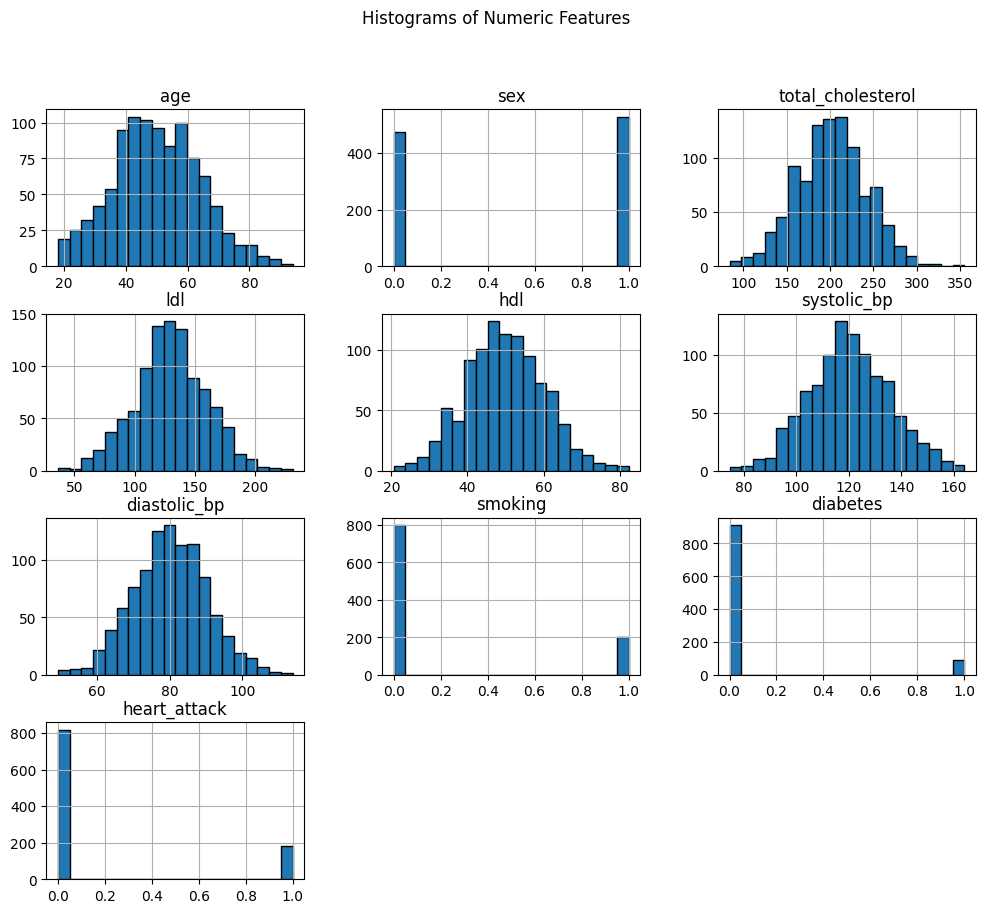

In [ ]:
data.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.show()


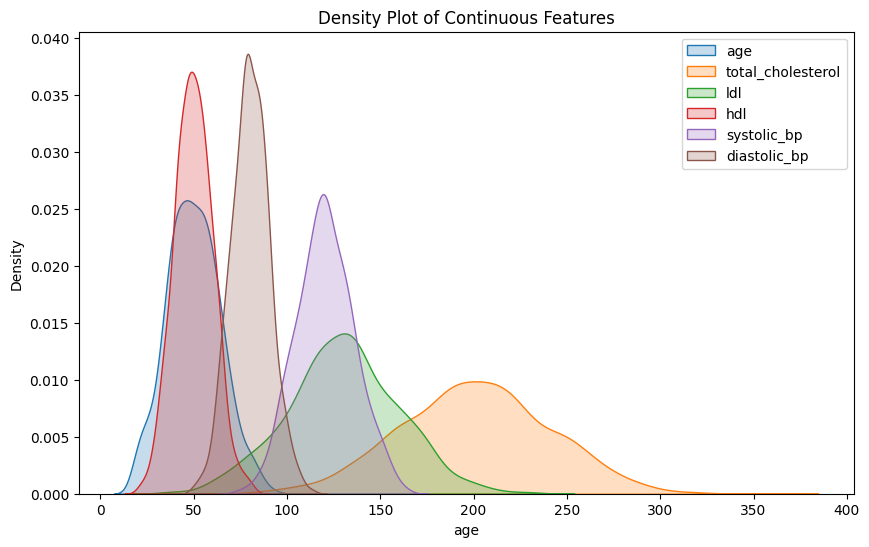

In [ ]:
plt.figure(figsize=(10,6))
for column in ['age', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp', 'diastolic_bp']:
    sns.kdeplot(data[column], label=column, fill=True)
plt.legend()
plt.title("Density Plot of Continuous Features")
plt.show()

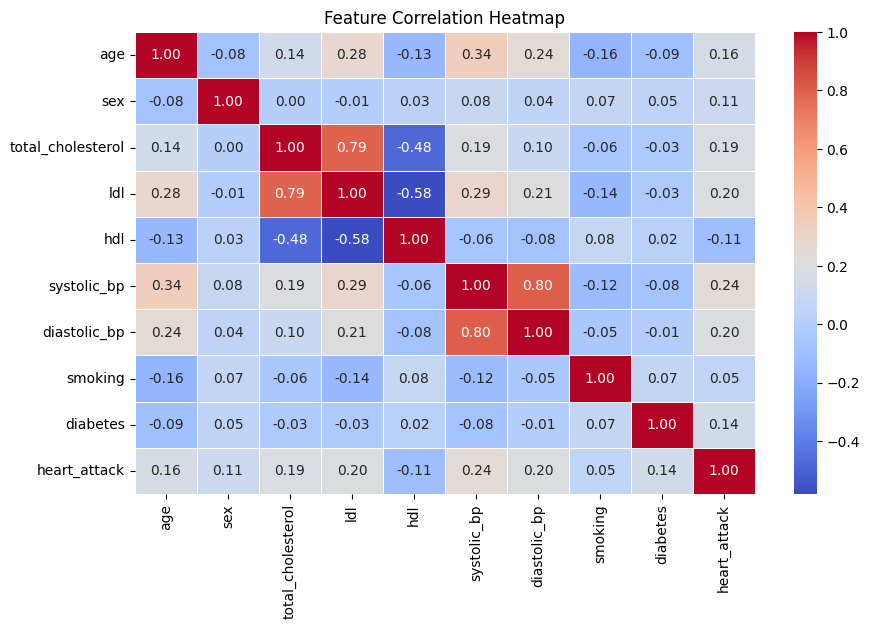

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

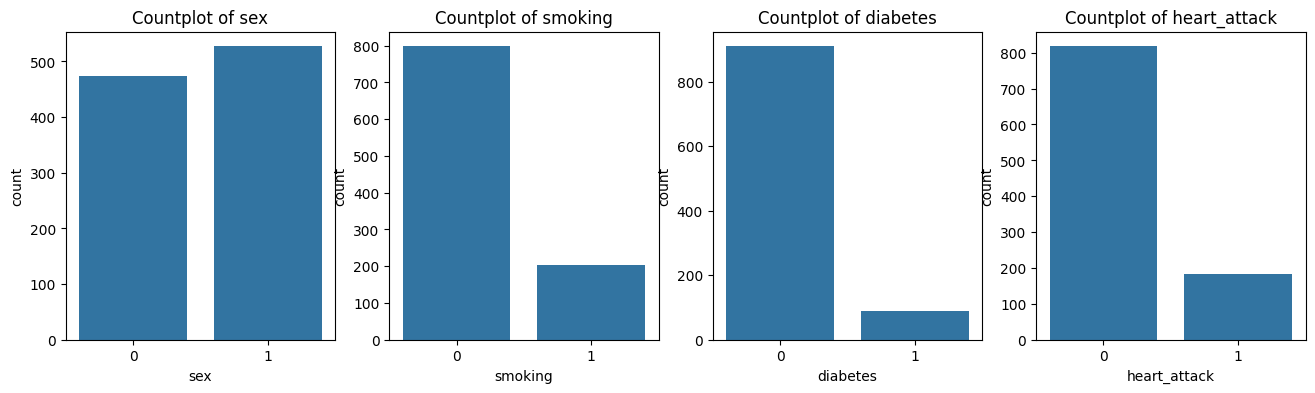

In [ ]:
categorical_cols = ['sex', 'smoking', 'diabetes', 'heart_attack']
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(16, 4))

for idx, col in enumerate(categorical_cols):
    sns.countplot(x=data[col], ax=axes[idx])
    axes[idx].set_title(f"Countplot of {col}")

plt.show()

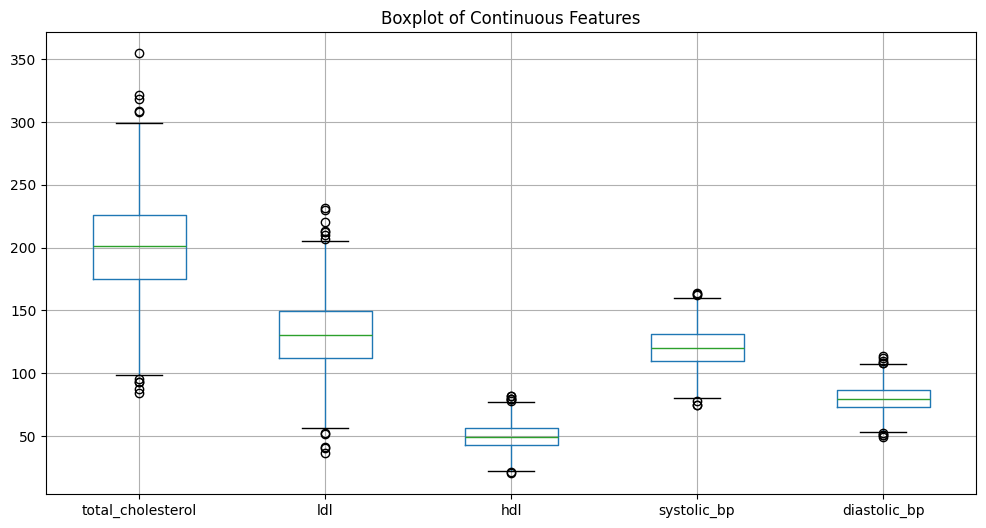

In [ ]:
plt.figure(figsize=(12, 6))
data[['total_cholesterol', 'ldl', 'hdl', 'systolic_bp', 'diastolic_bp']].boxplot()
plt.title("Boxplot of Continuous Features")
plt.show()

In [ ]:
num_cols = ['age', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp', 'diastolic_bp']

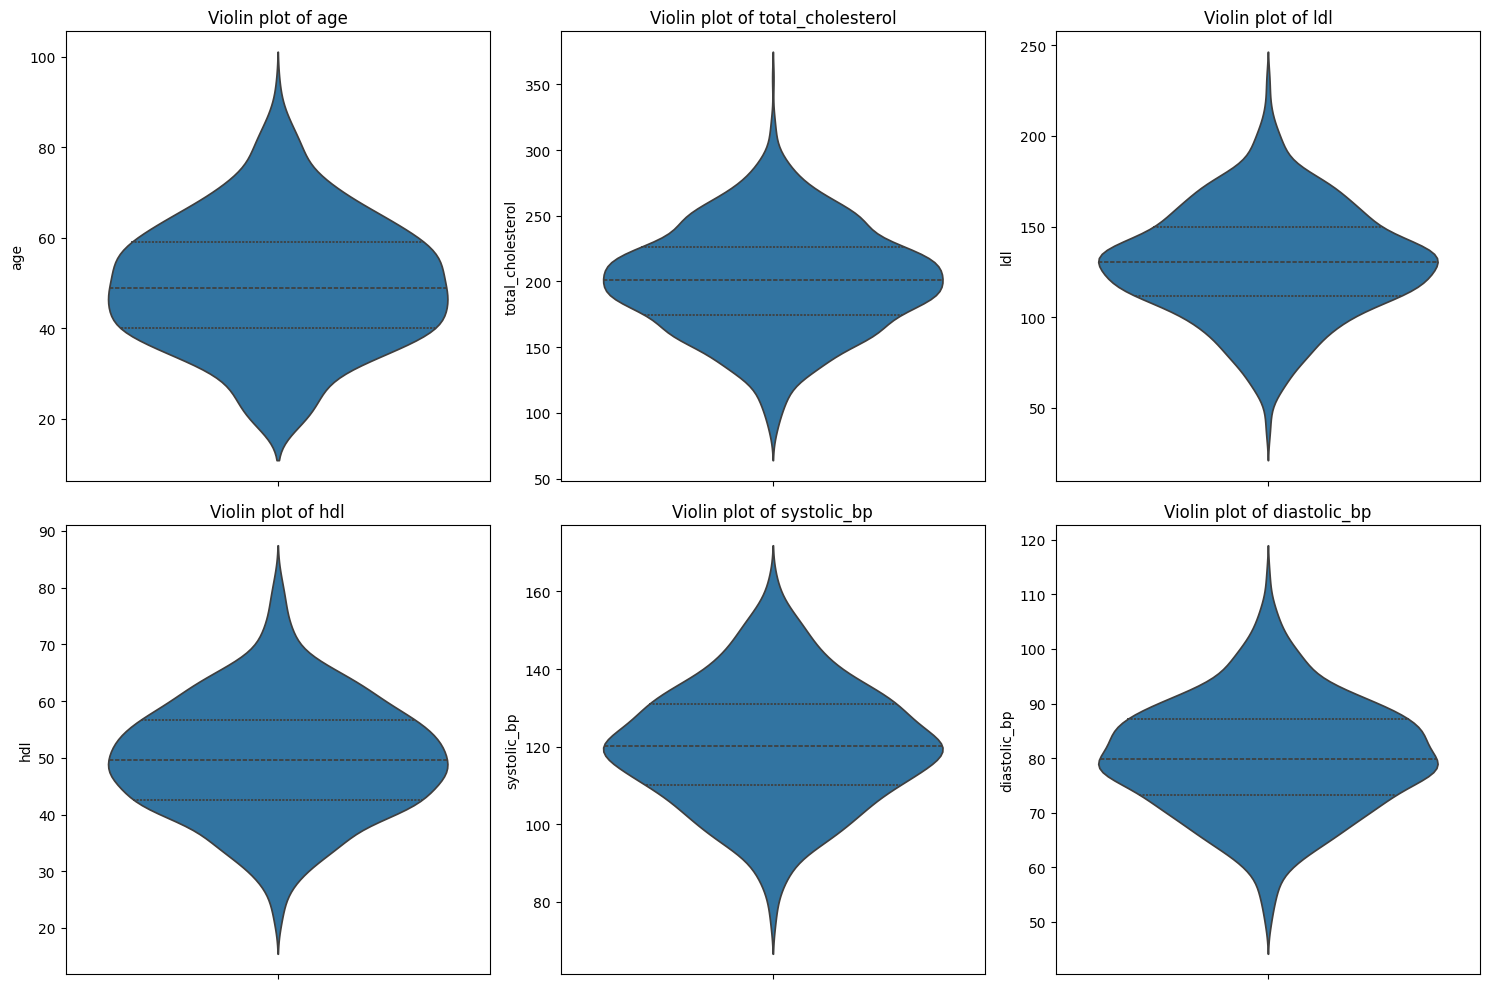

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.violinplot(y=data[col], ax=axes[i], inner='quartile')
    axes[i].set_title(f'Violin plot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
### 6. OUTLIER DETECTION USING IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

outliers = {}
for col in num_cols:
    outliers[col] = detect_outliers(data, col)

print("\nOutlier Counts:")
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")


Outlier Counts:
age: 4 outliers
total_cholesterol: 10 outliers
ldl: 12 outliers
hdl: 8 outliers
systolic_bp: 6 outliers
diastolic_bp: 9 outliers


In [ ]:
from scipy.stats import skew, kurtosis
### 7. SKEWNESS & KURTOSIS ANALYSIS
skew_vals = data[num_cols].apply(skew).rename("Skewness")
kurt_vals = data[num_cols].apply(kurtosis).rename("Kurtosis")

stats_df = pd.concat([skew_vals, kurt_vals], axis=1)
print("\nSkewness & Kurtosis Values:")
print(stats_df)


Skewness & Kurtosis Values:
                   Skewness  Kurtosis
age                0.157835 -0.218068
total_cholesterol  0.027614 -0.021681
ldl                0.022623  0.132969
hdl                0.116541 -0.030285
systolic_bp        0.051532 -0.165585
diastolic_bp       0.054846  0.047676


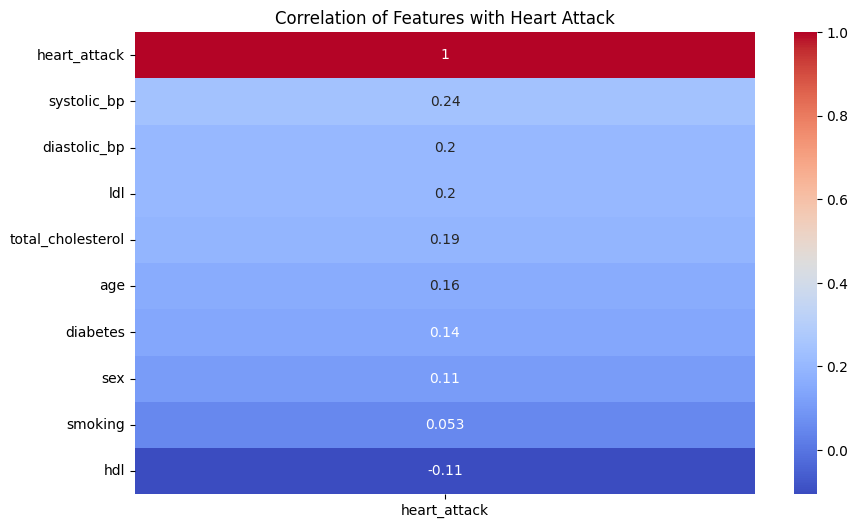

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr()[['heart_attack']].sort_values(by='heart_attack', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Heart Attack")
plt.show()

# Data Visualization

In [ ]:
! pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 6.6 MB/s eta 0:00:00


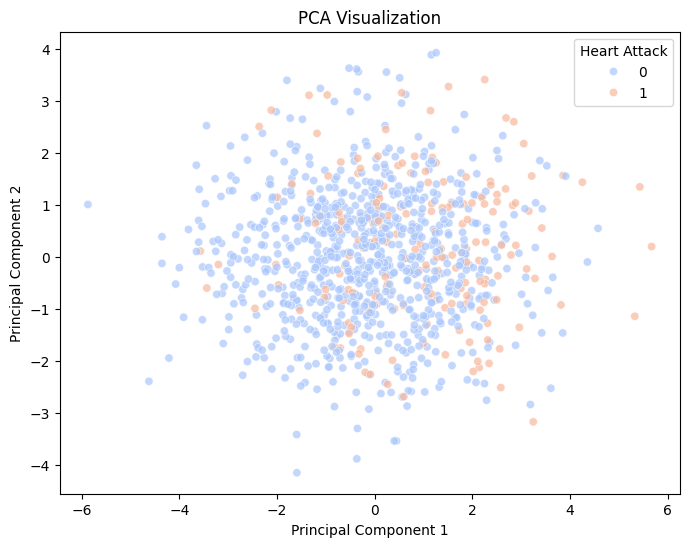

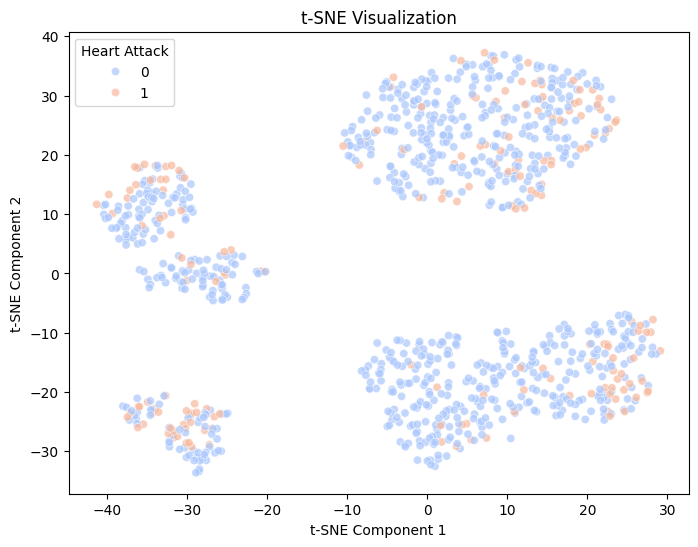

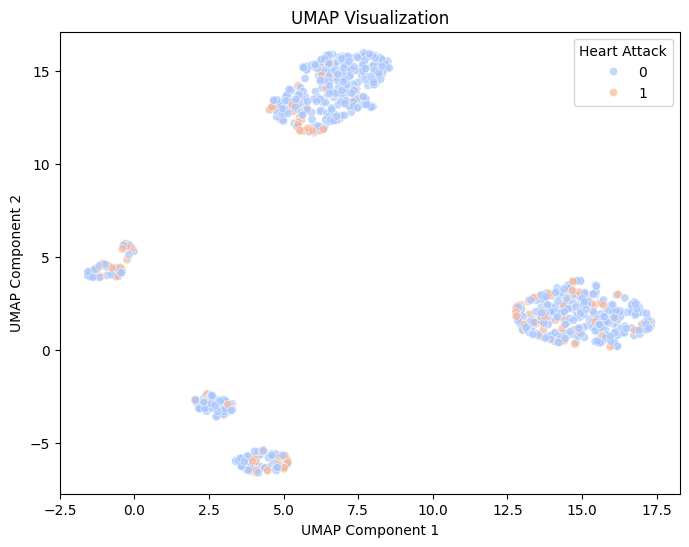

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

# Select features and target
features = ['age', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp', 'diastolic_bp', 'sex', 'smoking', 'diabetes']
X = data[features]
y = data['heart_attack']  # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 1. PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization")
plt.legend(title="Heart Attack", loc="best")
plt.show()

### 2. t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y, palette='coolwarm', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization")
plt.legend(title="Heart Attack", loc="best")
plt.show()

### 3. UMAP Visualization
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=y, palette='coolwarm', alpha=0.7)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Visualization")
plt.legend(title="Heart Attack", loc="best")
plt.show()


# Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

In [ ]:
features = ['age', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp', 'diastolic_bp', 'sex', 'smoking', 'diabetes']
X = data[features]
y = data['heart_attack']

In [ ]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
data_cleaned = remove_outliers(data, features)
X_cleaned = data_cleaned[features]
y_cleaned = data_cleaned['heart_attack']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       119
           1       1.00      0.14      0.24        22

    accuracy                           0.87       141
   macro avg       0.93      0.57      0.58       141
weighted avg       0.88      0.87      0.82       141

Accuracy Score: 0.8652482269503546


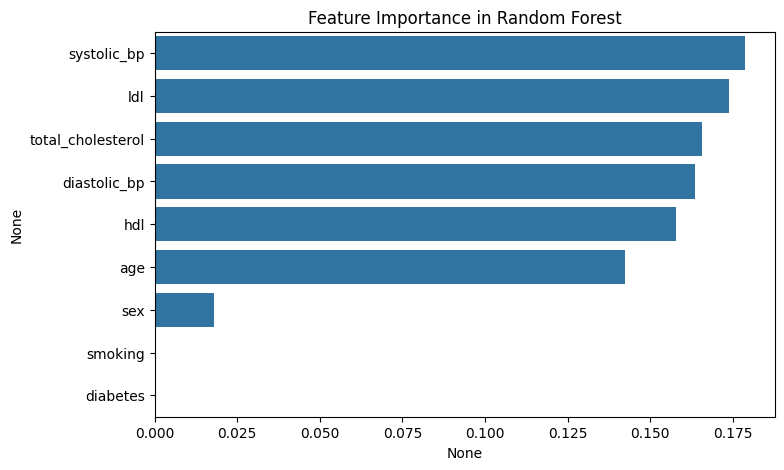

In [ ]:
# Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Classifier (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Feature Importance
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance in Random Forest")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       119
           1       0.00      0.00      0.00        22

    accuracy                           0.84       141
   macro avg       0.42      0.50      0.46       141
weighted avg       0.71      0.84      0.77       141

Model: Random Forest
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       119
           1       1.00      0.14      0.24        22

    accuracy                           0.87       141
   macro avg       0.93      0.57      0.58       141
weighted avg       0.88      0.87      0.82       141

Model: SVM
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       119
           1       0.00      0.00      0.00        22

    accuracy                           0.84       141
   macro avg       0.42      0.50      0.46       141
weighted avg   

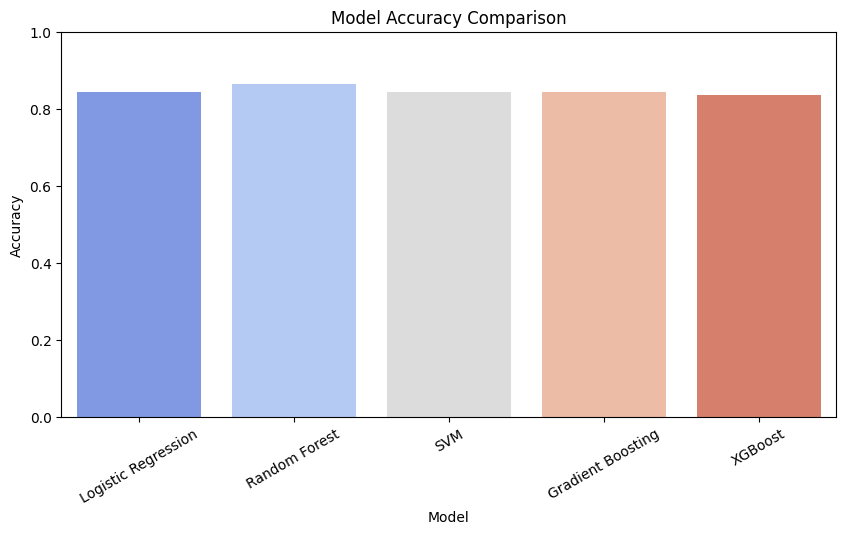

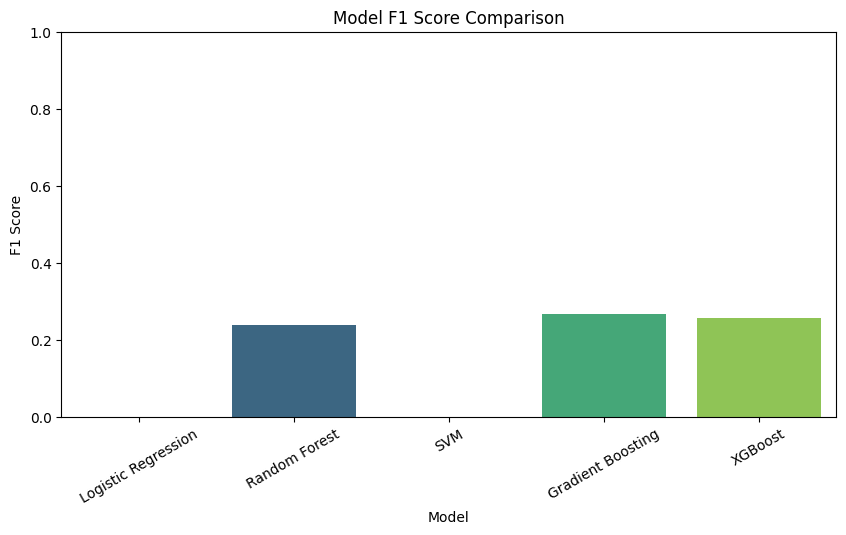

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train & Evaluate Models
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1})
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("="*50)

# Convert to DataFrame for Plotting
results_df = pd.DataFrame(results)

# Plot Model Comparison
plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="coolwarm")
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="F1 Score", data=results_df, palette="viridis")
plt.ylim(0,1)
plt.title("Model F1 Score Comparison")
plt.xticks(rotation=30)
plt.show()
